In [55]:
import numpy as np
from matplotlib import pyplot as plt
backend = plt.get_backend()
import jpcm
plt.switch_backend(backend)

In [302]:
s,t = np.mgrid[0:1:7j, 0:2*np.pi:7j]

In [303]:
def alp(R,r,t):
    A = R + r*np.cos(0.5*t)
    return np.array([A*np.cos(t),A*np.sin(t),r*np.sin(0.5*t)])
def beta(R,r,t):
    B = R + r*np.cos(np.pi+0.5*t)
    return np.array([B*np.cos(t),B*np.sin(t),r*np.sin(np.pi+0.5*t)])
def sig(s,t,R,r):
    return (1-s)*alp(R,r,t) + s*beta(R,r,t)

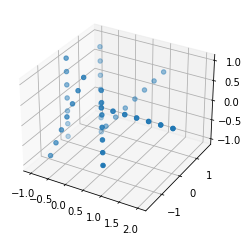

In [304]:
a,b,c = sig(s,t,1,1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=a,ys=b,zs=c)
plt.show()

In [305]:
u,v = np.mgrid[0:11:12j, 0:11:12j]
u=u.flatten()
v=v.flatten()

In [306]:
v2 = (6 + v)%12
x = (u + (v2%12 - 6))
y = (-u + v2)


In [307]:
ix = (y<=6) & (x>=0) & (x<12) & (y>=-6)
u = u[ix]
v = v[ix]
x = x[ix]
y = y[ix]

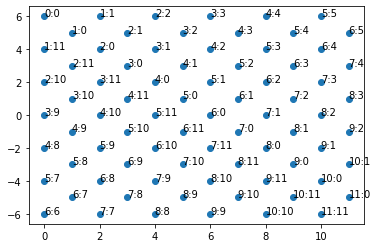

In [310]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y)
toXYZ = {}
iST ={}
for i, txt in enumerate(x):
    ax.annotate(f'{int(u[i])}:{int(v[i])}', (x[i], y[i]))
    s = (y[i]+6)/12
    t = 2*np.pi*(x[i]/12)
    toXYZ[f'{int(u[i])}:{int(v[i])}'] = sig(s,t,1,1)
    toXYZ[f'{int(v[i])}:{int(u[i])}'] = sig(s,t,1,1)
    iST[f'{int(u[i])}:{int(v[i])}'] = [s,t]
    iST[f'{int(v[i])}:{int(u[i])}'] = [s,t]
plt.show()

In [311]:
iST

{'0:0': [1.0, 0.0],
 '1:0': [0.91666666666666663, 0.52359877559829882],
 '0:1': [0.91666666666666663, 0.52359877559829882],
 '1:1': [1.0, 1.0471975511965976],
 '1:11': [0.83333333333333337, 0.0],
 '11:1': [0.83333333333333337, 0.0],
 '2:0': [0.83333333333333337, 1.0471975511965976],
 '0:2': [0.83333333333333337, 1.0471975511965976],
 '2:1': [0.91666666666666663, 1.5707963267948966],
 '1:2': [0.91666666666666663, 1.5707963267948966],
 '2:2': [1.0, 2.0943951023931953],
 '2:10': [0.66666666666666663, 0.0],
 '10:2': [0.66666666666666663, 0.0],
 '2:11': [0.75, 0.52359877559829882],
 '11:2': [0.75, 0.52359877559829882],
 '3:0': [0.75, 1.5707963267948966],
 '0:3': [0.75, 1.5707963267948966],
 '3:1': [0.83333333333333337, 2.0943951023931953],
 '1:3': [0.83333333333333337, 2.0943951023931953],
 '3:2': [0.91666666666666663, 2.6179938779914944],
 '2:3': [0.91666666666666663, 2.6179938779914944],
 '3:3': [1.0, 3.1415926535897931],
 '3:9': [0.5, 0.0],
 '9:3': [0.5, 0.0],
 '3:10': [0.583333333333333

In [76]:
import musicpy as mp
from scipy import stats

In [9]:
cfr = mp.read('midi/Animenz_-_Crying_for_Rain.mid')
t1 = cfr.tracks[0]

In [10]:
d = c.get_degree()
np.unique((np.sort(np.array(d) - min(d)))%12)

NameError: name 'c' is not defined

In [273]:
nms = np.array(['A','A#','B','C','C#','D','D#','E','F','F#','G','G#'])
def key_chord(chordname):
    cname = chordname
    if 'note' in cname:
        cname = chordname.replace('note','').replace(' ','')
    nm = cname[0]
    if cname[1] == '#':
        nm += '#'
    if nm in nms:
        return mp.note_to_degree(nm)%12
    if '[' in cname:
        # a of b style
        a,b = cname.split(']/[')
        return [key_chord(b),key_chord(a[1:])]
    return 'ERROR'
def current_key(keys,w=8):
    n = len(keys)
    out =  [stats.mode(keys[max(i-w,0):i+1,1])[0][0] for i in range(n)]
    return np.array(out).astype(int)

In [274]:
cs = mp.chord_analysis(t1,mode='chords')
keys = [key_chord(mp.detect(c,mode='chord')) for c in cs]
keys = np.array([[0,a] if not isinstance(a,list) else a for a in keys])
c_key = current_key(keys)

In [275]:
def quality(cs):
    """Generate the quality matrix from the chord-progression
    Args: 
        cs (musicpy chord object): input chord-progression
    Returns:
        np.array : 3-column quality matrix
    """
    q = np.zeros(shape=(len(cs),3))
    for i in range(len(cs)):
        c = cs[i]
        d = np.unique(c.get_degree())
        a = min(d)
        e = (d-a)%12
        q[i,0] = 0
        if len(e) > 1:
            q[i,1] = e[1]
        else: 
            q[i,1] = 0
        q[i,2] = e[len(e)-1]
    return q

In [276]:
# quality(cs)

In [277]:
state = np.vstack([c_key,keys.T,quality(cs).T]).T
state

array([[ 9.,  0.,  9.,  0.,  2.,  4.],
       [ 6.,  0.,  6.,  0.,  1.,  1.],
       [ 6.,  0.,  6.,  0.,  3.,  7.],
       ..., 
       [ 4.,  0.,  6.,  0.,  3.,  3.],
       [ 4.,  0.,  9.,  0.,  4.,  4.],
       [ 6.,  0.,  6.,  0.,  0.,  0.]])

In [288]:
intervals = np.vstack([[f"{int(state[i,0])}:{int(state[i,1])}",f"{int(state[i,1])}:{int(state[i,2])}",
            f"{int(state[i,3])}:{int(state[i,4])}",f"{int(state[i,4])}:{int(state[i,5])}"] for i in range(len(state))])
intervals

array([['9:0', '0:9', '0:2', '2:4'],
       ['6:0', '0:6', '0:1', '1:1'],
       ['6:0', '0:6', '0:3', '3:7'],
       ['6:0', '0:4', '0:4', '4:4'],
       ['6:0', '0:6', '0:0', '0:0'],
       ['6:0', '0:1', '0:3', '3:3'],
       ['6:0', '0:1', '0:3', '3:3'],
       ['6:0', '0:6', '0:2', '2:0'],
       ['6:0', '0:11', '0:2', '2:2'],
       ['6:0', '0:8', '0:1', '1:1'],
       ['6:0', '0:4', '0:2', '2:9'],
       ['6:0', '0:6', '0:7', '7:0'],
       ['6:0', '0:9', '0:4', '4:0'],
       ['1:0', '0:1', '0:8', '8:8'],
       ['1:0', '0:9', '0:4', '4:4'],
       ['1:0', '0:1', '0:0', '0:0'],
       ['9:0', '0:9', '0:2', '2:2'],
       ['9:0', '0:8', '0:1', '1:1'],
       ['9:0', '0:8', '0:0', '0:0'],
       ['9:0', '0:6', '0:2', '2:10'],
       ['8:0', '0:8', '0:1', '1:1'],
       ['8:0', '0:8', '0:1', '1:1'],
       ['8:0', '0:8', '0:1', '1:1'],
       ['8:0', '0:6', '0:2', '2:2'],
       ['8:0', '0:4', '0:4', '4:0'],
       ['8:0', '0:9', '0:5', '5:9'],
       ['8:0', '0:9', '0:2', '2:4'],

In [320]:
def toST(intervals):
    """Convert interval matrix to a ST-coordinate matrix (both np.ndarray elements)"""
    return np.array([[iST[rc] for rc in row] for row in intervals]) ### 4 (s,t) pairs for each chord element.
stcoord = toST(intervals)
print(stcoord.shape)
stcoord

(200, 4, 2)


array([[[ 0.25      ,  4.71238898],
        [ 0.25      ,  4.71238898],
        [ 0.83333333,  1.04719755],
        [ 0.83333333,  3.14159265]],

       [[ 0.5       ,  3.14159265],
        [ 0.5       ,  3.14159265],
        [ 0.91666667,  0.52359878],
        [ 1.        ,  1.04719755]],

       [[ 0.5       ,  3.14159265],
        [ 0.5       ,  3.14159265],
        [ 0.75      ,  1.57079633],
        [ 0.66666667,  5.23598776]],

       ..., 
       [[ 0.66666667,  2.0943951 ],
        [ 0.5       ,  3.14159265],
        [ 0.75      ,  1.57079633],
        [ 1.        ,  3.14159265]],

       [[ 0.66666667,  2.0943951 ],
        [ 0.25      ,  4.71238898],
        [ 0.66666667,  2.0943951 ],
        [ 1.        ,  4.1887902 ]],

       [[ 0.5       ,  3.14159265],
        [ 0.5       ,  3.14159265],
        [ 1.        ,  0.        ],
        [ 1.        ,  0.        ]]])

In [ ]:
def motionST(stcoord):
    """simple differencing of the st coordinates (the input). 
    Returns a flattened difference array (both np.ndarray objects) with one less point (due to differencing)"""
    out = stcoord[1:] - stcoord[:len(stcoord)-1]
    out = [np.concatenate([out[i,:,0],out[i,:,1]]) for i in range(len(out))]
    return out
stdiff=motionST(stcoord)
stdiff

[array([ 0.25      ,  0.25      ,  0.08333333,  0.16666667, -1.57079633,
        -1.57079633, -0.52359878, -2.0943951 ]),
 array([ 0.        ,  0.        , -0.16666667, -0.33333333,  0.        ,
         0.        ,  1.04719755,  4.1887902 ]),
 array([ 0.        ,  0.16666667, -0.08333333,  0.33333333,  0.        ,
        -1.04719755,  0.52359878, -1.04719755]),
 array([ 0.        , -0.16666667,  0.33333333,  0.        ,  0.        ,
         1.04719755, -2.0943951 , -4.1887902 ]),
 array([ 0.        ,  0.41666667, -0.25      ,  0.        ,  0.        ,
        -2.61799388,  1.57079633,  3.14159265]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        , -0.41666667,  0.08333333, -0.16666667,  0.        ,
         2.61799388, -0.52359878, -2.0943951 ]),
 array([ 0.        , -0.41666667,  0.        ,  0.16666667,  0.        ,
         2.61799388,  0.        ,  1.04719755]),
 array([ 0.        ,  0.25      ,  0.08333333,  0.        ,  0.        ,
        -1.57079633, -0

In [ ]:
help(mp.negative_harmony)
help(mp.random_composing)

Help on function negative_harmony in module musicpy.musicpy:

negative_harmony(key, current_chord=None, sort=False, get_map=False)

Help on function random_composing in module musicpy.musicpy:

random_composing(mode, length, difficulty='easy', init_notes=None, pattern=None, focus_notes=None, focus_ratio=0.7, avoid_dim_5=True, num=3, left_hand_velocity=70, right_hand_velocity=80, left_hand_meter=4, right_hand_meter=4, choose_intervals=[0.125, 0.25, 0.5], choose_durations=[0.125, 0.25, 0.5], melody_interval_tol=5, choose_from_chord=False)



In [ ]:
a

NameError: name 'a' is not defined

In [ ]:
A1 = mp.C('Cmaj7') % (1, 1/8)
B1 = mp.chord('A2') % (1,1)
C1 = mp.chord('C,D,E,F,G') % (1/8, 1/8)
D1 = mp.chord('C5')

new_piece =  mp.piece([A1, B1, C1, D1],
                  ['Acoustic Grand Piano', 'Electric Bass (finger)', 'Orchestral Harp', 'Synth Drum'],
                  150,
                  [0, 2, 2, 4],9
                  ['piano', 'bass', 'harp', 'drum'])

In [348]:
mp.play(new_piece)

[
    {
        'chd' : 'Cmaj7',
        'time': 1,
        'arp' : 1/8,
        'start': 0,
        'inst' : 'Acoustic Grand Piano'
    },
    {
        'chd' : 'A2',
        'time': 1,
        'arp' : 1,
        'start': 2,
        'inst' : 'Acoustic Grand Piano'
    }
]